In [ ]:
import pandas as pd
import numpy as np
import graphviz 

from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz, plot_tree, export_text
from sklearn.metrics import confusion_matrix, balanced_accuracy_score


In [ ]:
def plot_decision_boundaries(X, y, model_class, ax, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    model = model_class
    # # Instantiate the model object
    # model = model_class(**model_params)
    # # Fits the model with the reduced data
    # model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    # plt.contourf(xx, yy, Z, alpha=0.4)
    # plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    # plt.xlabel("Feature-1",fontsize=15)
    # plt.ylabel("Feature-2",fontsize=15)
    # plt.xticks(fontsize=14)
    # plt.yticks(fontsize=14)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    # ax.xlabel("Feature-1",fontsize=15)
    # ax.ylabel("Feature-2",fontsize=15)
    # ax.xticks(fontsize=14)
    # ax.yticks(fontsize=14)
    return ax

def plot_tree_complete(clf, data):
  dot_data = export_graphviz(clf, out_file=None, 
                      feature_names=data.feature_names,  
                      class_names=data.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
  graph = graphviz.Source(dot_data)  
  return graph 

In [ ]:
# df_diabetes = pd.read_csv('sample_data/diabetes.csv')
# data = datasets.load_breast_cancer()
data=datasets.load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [ ]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
pd.Series(y).value_counts()

1    71
0    59
2    48
dtype: int64

# Será que diferentes critérios de separacão resultam nas mesmas árvores?

### Índice Gini

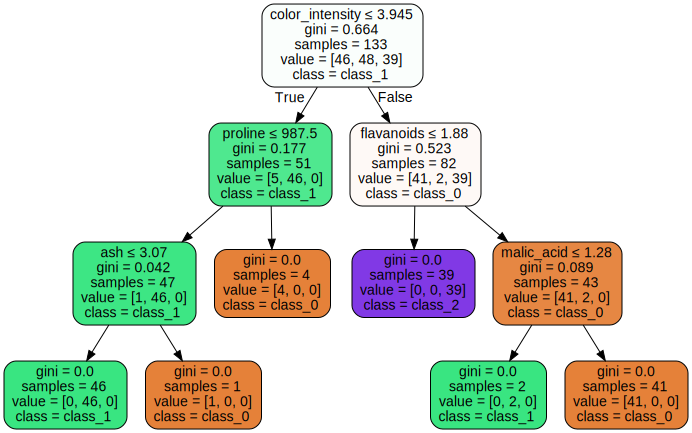

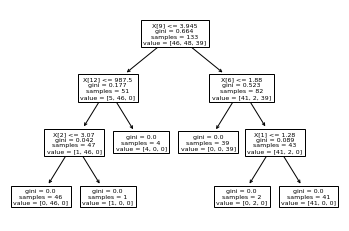

In [ ]:
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=10)
dt_gini.fit(X_train, y_train)
plot_tree(dt_gini) 
plot_tree_complete(dt_gini, data)

In [ ]:
r = export_text(dt_gini, data.feature_names)
print(r)

|--- color_intensity <= 3.95
|   |--- proline <= 987.50
|   |   |--- ash <= 3.07
|   |   |   |--- class: 1
|   |   |--- ash >  3.07
|   |   |   |--- class: 0
|   |--- proline >  987.50
|   |   |--- class: 0
|--- color_intensity >  3.95
|   |--- flavanoids <= 1.88
|   |   |--- class: 2
|   |--- flavanoids >  1.88
|   |   |--- malic_acid <= 1.28
|   |   |   |--- class: 1
|   |   |--- malic_acid >  1.28
|   |   |   |--- class: 0



In [ ]:
feat_imp_gini = pd.DataFrame(dt_gini.feature_importances_)
feat_imp_gini.insert(1, "Atributo", data.feature_names, True)
feat_imp_gini = feat_imp_gini.rename(columns={0:'Importancia_Gini'})
feat_imp_gini = feat_imp_gini.set_index('Atributo')
feat_imp_gini.sort_values(by='Importancia_Gini', ascending=False)

,Importancia_Gini
Atributo,
flavanoids,0.442524
color_intensity,0.412187
proline,0.079951
malic_acid,0.043178
ash,0.022160
alcohol,0.000000
alcalinity_of_ash,0.000000
magnesium,0.000000
total_phenols,0.000000


### Entropia

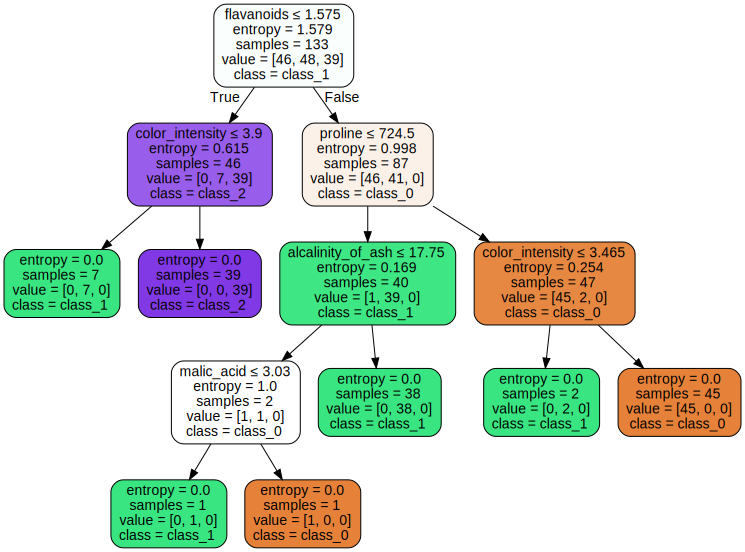

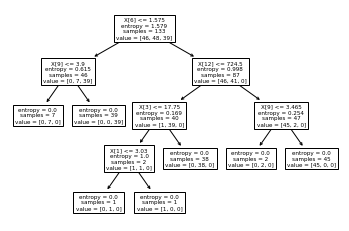

In [ ]:
dt_ent = DecisionTreeClassifier(criterion='entropy', random_state=10)
dt_ent.fit(X_train, y_train)
plot_tree(dt_ent) 
plot_tree_complete(dt_ent, data)

In [ ]:
r = export_text(dt_ent, data.feature_names)
print(r)

|--- flavanoids <= 1.58
|   |--- color_intensity <= 3.90
|   |   |--- class: 1
|   |--- color_intensity >  3.90
|   |   |--- class: 2
|--- flavanoids >  1.58
|   |--- proline <= 724.50
|   |   |--- alcalinity_of_ash <= 17.75
|   |   |   |--- malic_acid <= 3.03
|   |   |   |   |--- class: 1
|   |   |   |--- malic_acid >  3.03
|   |   |   |   |--- class: 0
|   |   |--- alcalinity_of_ash >  17.75
|   |   |   |--- class: 1
|   |--- proline >  724.50
|   |   |--- color_intensity <= 3.46
|   |   |   |--- class: 1
|   |   |--- color_intensity >  3.46
|   |   |   |--- class: 0



In [ ]:
feat_imp_ent = pd.DataFrame(dt_ent.feature_importances_)
feat_imp_ent.insert(1, "Atributo", data.feature_names, True)
feat_imp_ent = feat_imp_ent.rename(columns={0:'Importancia_Entropia'})
feat_imp_ent = feat_imp_ent.set_index('Atributo')
feat_imp_ent.sort_values(by='Importancia_Entropia', ascending=False)

,Importancia_Entropia
Atributo,
flavanoids,0.452088
proline,0.324259
color_intensity,0.191536
alcalinity_of_ash,0.022596
malic_acid,0.009521
alcohol,0.000000
ash,0.000000
magnesium,0.000000
total_phenols,0.000000


# Comparacão da relevância dos atributos

In [ ]:
feat_imp = feat_imp_gini.copy()
feat_imp = feat_imp.merge(feat_imp_ent, left_index=True, right_index=True)
feat_imp = feat_imp.sort_values(['Importancia_Gini', 'Importancia_Entropia'], ascending=False)
feat_imp

,Importancia_Gini,Importancia_Entropia
Atributo,,
flavanoids,0.442524,0.452088
color_intensity,0.412187,0.191536
proline,0.079951,0.324259
malic_acid,0.043178,0.009521
ash,0.022160,0.000000
alcalinity_of_ash,0.000000,0.022596
alcohol,0.000000,0.000000
magnesium,0.000000,0.000000
total_phenols,0.000000,0.000000


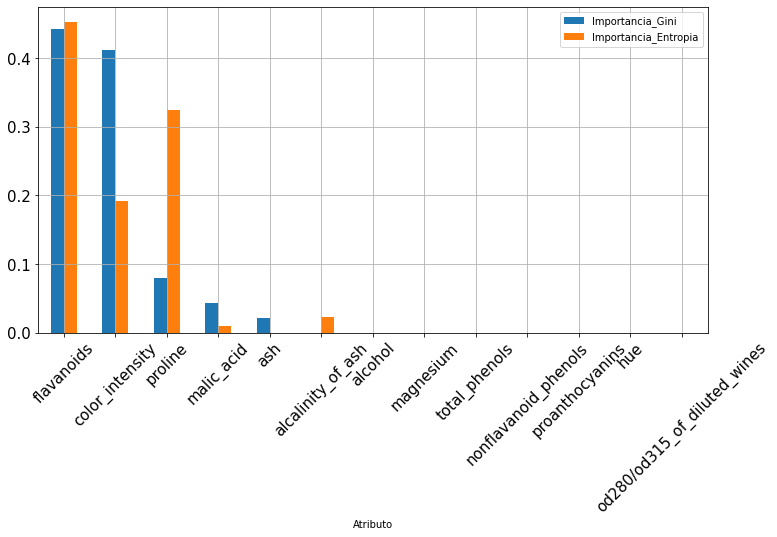

In [ ]:
feat_imp.plot.bar(figsize=[12,6], legend=True, fontsize=15, rot=45, grid=True)

# Qual o impacto no desempenho?

In [ ]:
clfs = [dt_gini, dt_ent]
indices = ['Gini', 'Entropia']

bal_acc_results_list = []

for clf in clfs:
  train_acc = balanced_accuracy_score(y_train, clf.predict(X_train))
  test_acc  = balanced_accuracy_score(y_test, clf.predict(X_test))

  bal_acc_results_list.append({'Treino': train_acc, 'Teste': test_acc})

df_bal_acc_results = pd.DataFrame(bal_acc_results_list)

In [ ]:
df_bal_acc_results.insert(2, "Criterio", indices, True)
df_bal_acc_results = df_bal_acc_results.set_index('Criterio')

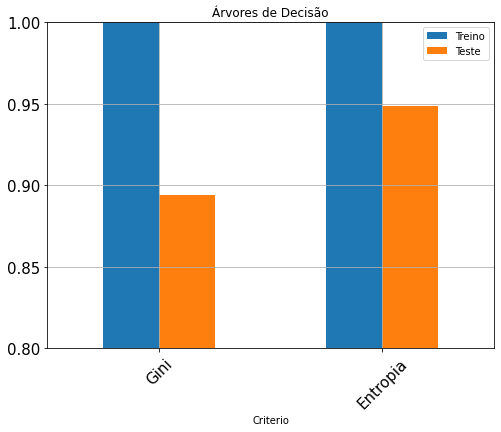

In [ ]:
df_bal_acc_results.plot.bar(figsize=[8,6], legend=True, fontsize=15, rot=45, grid=True, yticks=[0.8, 0.85, 0.9, 0.95, 1.0], ylim=[0.8, 1.0], title='Árvores de Decisão')

# Agora é a sua vez!  

Escolha um parâmetro para otimizar e observe o impacto no desempenho das suas árvores de decisão!

- **max_depth**: int, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- **min_samples_split**: int or float, default=2
The minimum number of samples required to split an internal node:

  - If int, then consider min_samples_split as the minimum number.

  - If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

- **min_samples_leaf**: int or float, default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

  - If int, then consider min_samples_leaf as the minimum number.

  - If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

- **max_features**: int, float or {“auto”, “sqrt”, “log2”}, default=None
The number of features to consider when looking for the best split:

  - If int, then consider max_features features at each split.

  - If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.

  - If “auto”, then max_features=sqrt(n_features).

  - If “sqrt”, then max_features=sqrt(n_features).

  - If “log2”, then max_features=log2(n_features).

  - If None, then max_features=n_features.

  - Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


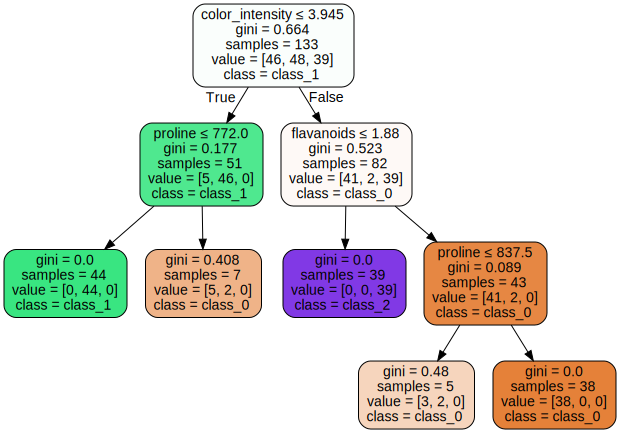

In [ ]:
# min_samples_leaf=5, min_samples_split=5
dt_min_samples_leaf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_split=None, min_samples_leaf=5, min_samples_split=5, min_weight_fraction_leaf=0.0,
presort=False, random_state=10, splitter='best')
dt_min_samples_leaf.fit(X_train, y_train)
plot_tree_complete(dt_min_samples_leaf, data)

In [ ]:
feat_impdt_min_samples_leaf = pd.DataFrame(dt_min_samples_leaf.feature_importances_)
feat_impdt_min_samples_leaf.insert(1, "Atributo", data.feature_names, True)
feat_impdt_min_samples_leaf = feat_impdt_min_samples_leaf.rename(columns={0:'Min_Samples_Leaf'})
feat_impdt_min_samples_leaf = feat_impdt_min_samples_leaf.set_index('Atributo')
feat_impdt_min_samples_leaf.sort_values(by='Min_Samples_Leaf', ascending=False)

,Min_Samples_Leaf
Atributo,
flavanoids,0.470528
color_intensity,0.438271
proline,0.091201
alcohol,0.000000
malic_acid,0.000000
ash,0.000000
alcalinity_of_ash,0.000000
magnesium,0.000000
total_phenols,0.000000


In [ ]:
clfs = [dt_gini, dt_ent, dt_min_samples_leaf]
indices = ['Gini', 'Entropia', 'Leaf']

bal_acc_results_list = []

for clf in clfs:
  train_acc = balanced_accuracy_score(y_train, clf.predict(X_train))
  test_acc  = balanced_accuracy_score(y_test, clf.predict(X_test))
  
  bal_acc_results_list.append({'Treino': train_acc, 'Teste': test_acc})

df_bal_acc_results = pd.DataFrame(bal_acc_results_list)

In [ ]:
df_bal_acc_results.insert(2, "Criterio", indices, True)
df_bal_acc_results = df_bal_acc_results.set_index('Criterio')

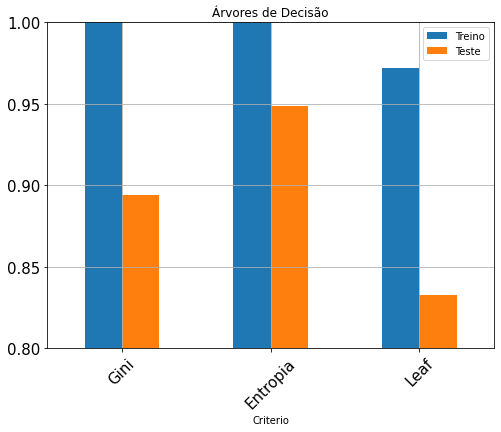

In [ ]:
df_bal_acc_results.plot.bar(figsize=[8,6], legend=True, fontsize=15, rot=45, grid=True, yticks=[0.8, 0.85, 0.9, 0.95, 1.0], ylim=[0.8, 1.0], title='Árvores de Decisão')